In [3]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from src import config, hb_beta_model

model_name = "model_20260117_075022"
model_dir = config.figures_dir / "hbb" / model_name / "trained_model"

model = hb_beta_model.HierarchicalBetaModel.load_model(model_dir)

Loading model from /Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/reef_cover_economics/figures/hbb/model_20260117_075022/trained_model
	Loading trace from /Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/reef_cover_economics/figures/hbb/model_20260117_075022/trained_model/model_trace.nc
	Loaded reef_to_site_map with 2949 entries
	Loaded n_observations: 7714
Model loaded successfully


In [ ]:
# view trace info
print(az.summary(model.trace).head())
# plot model trace
az.plot_trace(model.trace)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.094,5.039,-8.260,8.781,2.178,0.800,6.0,23.0,1.53
beta[1],0.143,0.060,0.038,0.248,0.005,0.003,162.0,139.0,1.02
beta[2],-0.028,0.009,-0.044,-0.012,0.000,0.000,401.0,265.0,1.01
beta[3],-0.076,0.026,-0.130,-0.034,0.002,0.001,125.0,172.0,1.02
beta[4],-0.065,0.035,-0.131,-0.003,0.003,0.002,180.0,209.0,1.00
...,...,...,...,...,...,...,...,...,...
site_effect[2944],-0.622,5.020,-9.529,7.491,2.162,0.797,6.0,22.0,1.53
site_effect[2945],-0.279,5.040,-8.988,8.126,2.176,0.801,6.0,28.0,1.53
site_effect[2946],0.218,5.045,-8.706,8.354,2.176,0.805,6.0,28.0,1.53
site_effect[2947],-1.572,5.034,-10.265,6.811,2.171,0.804,6.0,23.0,1.53


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'beta_diversity'}>,
        <Axes: title={'center': 'beta_diversity'}>],
       [<Axes: title={'center': 'mu_global'}>,
        <Axes: title={'center': 'mu_global'}>],
       [<Axes: title={'center': 'ecoregion_offset'}>,
        <Axes: title={'center': 'ecoregion_offset'}>],
       [<Axes: title={'center': 'site_offset'}>,
        <Axes: title={'center': 'site_offset'}>],
       [<Axes: title={'center': 'sigma_ecoregion'}>,
        <Axes: title={'center': 'sigma_ecoregion'}>],
       [<Axes: title={'center': 'sigma_site'}>,
        <Axes: title={'center': 'sigma_site'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'ecoregion'}>,
        <Axes: title={'center': 'ecoregion'}>],
       [<Axes: title={'center': 'site_effect'}>,
        <Axes: title={'center': 'site_effect'}>]], dtype=object)

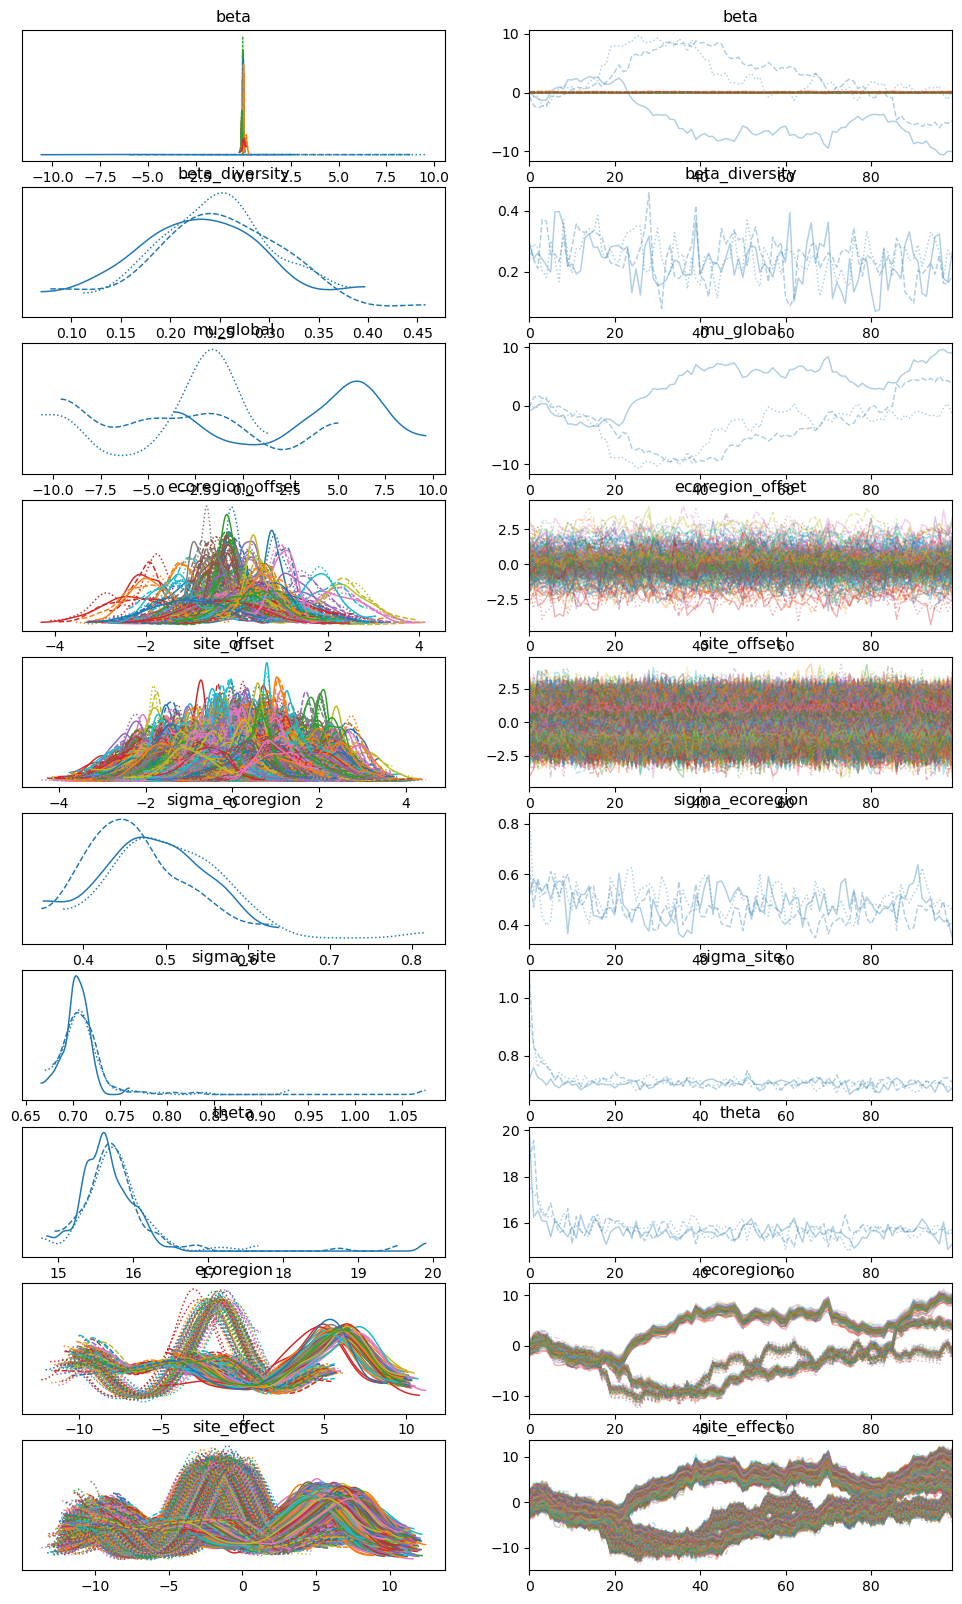

In [5]:
# plot model trace
az.plot_trace(model.trace)

In [ ]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from utils import config, plot_utils


### load data
sully_dir_fp = config.data_dir / "sully_hbb"
data_for_maps_df = pd.read_csv(sully_dir_fp / "data_for_maps.csv")
data_for_maps_df.head()

In [ ]:
# import numpy as np
# import pandas as pd
# from reefshift.utils import config, plot_utils
# import matplotlib.pyplot as plt

# beta_est = pd.read_csv(config.figures_dir / "hbb" / "beta_est.csv")

# beta_est.rename(columns={"Unnamed: 0": "variable"}, inplace=True)
# beta_est.set_index("variable", inplace=True)
# coef_summary = beta_est.sort_values('mean')

# if 'Intercept' in coef_summary.index:
#     coef_summary = coef_summary.drop('Intercept')


# fig, ax = plt.subplots()

# # Sort by coefficient magnitude

# y_pos = np.arange(len(coef_summary))

# # Determine colors based on significance
# colors = []
# for idx, row in coef_summary.iterrows():
#     if row['hdi_3%'] > 0:
#         colors.append('blue')
#     elif row['hdi_97%'] < 0:
#         colors.append('red')
#     else:
#         colors.append('gray')

# # Plot error bars (94% HDI)
# ax.hlines(y_pos, coef_summary['hdi_3%'], coef_summary['hdi_97%'], color='black', linewidth=1)
# # dummy label for point significant legend
# ax.scatter([], [], c='blue', s=100, zorder=5, edgecolor='black', label='Significant positive')
# ax.scatter([], [], c='red', s=100, zorder=5, edgecolor='black', label='Significant negative')
# ax.scatter([], [], c='gray', s=100, zorder=5, edgecolor='black', label='Not significant')
# # Plot points
# ax.scatter(coef_summary['mean'], y_pos, c=colors, s=100, zorder=5, edgecolor='black')

# # Add zero line
# ax.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# yticks_dict = {
#     "lat_stzd": "Latitude",
#     "historical_sst_max_stzd": "Max. historical SST",
#     "ssta_dhwmax_stzd": "Max. SSTA DHW",
#     "tsa_freqstdev_stzd": "TSA standard deviation",
#     "ssta_min_stzd": "Min. SST anomaly",
#     "tsa_max_stzd": "Max. TSA anomaly",
#     "beta_diversity": "Beta diversity",
#     "sst_mean_stzd": "Mean SST",
#     "depth_stzd": "Depth",
#     "ssta_mean_stzd": "Mean SSTA",
#     "cyclone_stzd": "Cyclone frequency",
#     "ssta_freqstdev_stzd": "SSTA frequency",
#     "human_pop_stzd": "Local human population",
#     "turbidity_mean_stzd": "Mean turbidity",
# }

# ax.set_yticks(y_pos)
# ax.set_yticklabels([yticks_dict[ind] for ind in coef_summary.index])
# ax.set_xlabel('Estimated coefficient')
# # ax.set_title('Beta Regression Coefficients')
# ax.set_xlim(-0.5, 0.5)
# ax.legend(loc="lower right")
# ax.grid(which="major", axis="x", linestyle="--", linewidth=0.5)
# plt.tight_layout()


In [ ]:
### as predicted by the original model, apparently. Half that recorded in paper figures

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].hist(df.y_future_rcp45_yr_2050_change, bins=50, alpha=0.5, color="lightblue")
axes[0].hist(df.y_future_rcp85_yr_2050_change, bins=50, alpha=0.5, color="lightcoral")
axes[1].hist(df.y_future_rcp45_yr_2100_change, bins=50, alpha=0.5, color="lightblue")
axes[1].hist(df.y_future_rcp85_yr_2100_change, bins=50, alpha=0.5, color="lightcoral")
axes[1].set_xlabel("Change in coral cover (%)")
fig.suptitle("Coral cover change by RCP")

for ax in axes:
    ax.legend(["RCP4.5", "RCP8.5"])
    ax.set_ylabel("Count")

In [ ]:
# plot relative change (divide change by current cover)
data = 100 * df.y_future_rcp85_yr_2100_change / df.average_coral_cover
# make anything below -100 equal to -100
data[data < -100] = -100
# make anything above 100 equal to 100
data[data > 100] = 100

plt.hist(data, density=True)

In [ ]:
df.y_future_rcp85_yr_2100_change

In [ ]:
%reload_ext autoreload
%autoreload 2

from src import hb_beta_model
from reefshift.utils import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    "/maps/rt582/reefshift/figures/hbb/model_20260116_181352/data_processed.csv"
)
# convert sst_mean_rcp85_2100 values to Kelvin to match other sst variables
# df['sst_mean_rcp85_2100'] = df['sst_mean_rcp85_2100'] + 273.15

model = hb_beta_model.HierarchicalBetaModel.load_model(
    config.figures_dir / "hbb" / "model_20260116_181352" / "trained_model"
)

In [ ]:
import arviz as az

az.summary(model.trace)


In [ ]:
model.col_names


In [ ]:
np.sqrt(1 / 0.0001)

In [ ]:
import numpy as np

X_current, site_idx = hb_beta_model.build_current_design_matrix(
    model, df=df, standardization_stats=model.standardization_stats
)

projected_df = hb_beta_model.project_future_coral_cover(
    model,
    df=df,
    X_current=X_current,
    site_idx=site_idx,
    changed_columns={
        "human_pop_stzd": "human_pop_2100_vals",
        "sst_mean_stzd": "sst_mean_rcp85_2100",
    },
    # changed_columns={'human_pop_stzd': 'human_pop_stzd', 'sst_mean_stzd': 'sst_mean_stzd'}
)

projected_df.head()

In [ ]:
# plot histogram of current and future coral cover
plt.hist(projected_df.Y_current, color="lightblue", alpha=0.5, label="Current")
plt.hist(projected_df.Y_future, color="lightcoral", alpha=0.5, label="Future")
plt.legend()
fig, ax = plt.subplots()
# plot relative coral cover change
plt.hist(
    projected_df.Y_relative_percent_change,
    color="lightgreen",
    alpha=0.5,
    label="Relative",
)

In [ ]:
# TODO: these aren't correct (compared to maps in paper: https://onlinelibrary-wiley-com.ezp.lib.cam.ac.uk/doi/10.1111/gcb.16083)...
plt.hist(df.Y_future_RCP85_yr_2100)

In [ ]:
# plot circle
circle = make_circle(X, Y, 0.5)
# plt.contour(X, Y, circle)
plt.scatter(X, Y, c=circle)
# set axis equal
plt.gca().set_aspect("equal", adjustable="box")
plt.show()


In [ ]:
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
X, Y = np.meshgrid(x, y)


# make a circular plot
def make_circle(x, y, r):
    return x**2 + y**2 < r**2


# Generate a mask where only the outer rim of the circle is 1; all else is 0
circle_mask = np.zeros_like(X, dtype=np.uint8)
# Find points inside the circle
inside = make_circle(X, Y, 0.5)
# The rim is defined as points inside the circle with at least one neighbor outside
from scipy.ndimage import binary_erosion

eroded = binary_erosion(inside)
rim = inside & (~eroded)
circle_mask[rim] = 1
plt.imshow(circle_mask)

In [ ]:
circle

In [ ]:
# plot double panel with Y_future_RCP45_yr_2050_change and Y_future_RCP45_yr_2100_change
fig, axs = plt.subplots(
    2,
    1,
    figsize=(10, 8),
    subplot_kw={"projection": ccrs.PlateCarree(central_longitude=180)},
)

# formatting
[plot_utils.format_geo_axes(ax) for ax in axs]
plt.tight_layout()

# create colorbar normalised to the max of the absolute values (of both datasets)
vmin = min(
    df["Y_future_RCP45_yr_2050_change"].min(), df["Y_future_RCP45_yr_2100_change"].min()
)
vmax = max(
    df["Y_future_RCP45_yr_2050_change"].max(),
    (df["Y_future_RCP45_yr_2100_change"].max()),
)

# create colorbar
sm = plt.cm.ScalarMappable(cmap="Reds_r", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs, orientation="horizontal", pad=0.01)
cbar.set_label("Change in coral cover (%)")

axs[0].scatter(
    df["Longitude.Degrees"],
    df["Latitude.Degrees"],
    c=df["Y_future_RCP45_yr_2050_change"],
    alpha=0.5,
    s=2,
    cmap="Reds_r",
    transform=ccrs.PlateCarree(),
)
axs[1].scatter(
    df["Longitude.Degrees"],
    df["Latitude.Degrees"],
    c=df["Y_future_RCP45_yr_2100_change"],
    alpha=0.5,
    s=2,
    cmap="Reds_r",
    transform=ccrs.PlateCarree(),
)

In [ ]:
# plot double panel with Y_future_RCP45_yr_2050_change and Y_future_RCP45_yr_2100_change
fig, axs = plt.subplots(
    2,
    1,
    figsize=(10, 8),
    subplot_kw={"projection": ccrs.PlateCarree(central_longitude=180)},
)

# formatting
[plot_utils.format_geo_axes(ax) for ax in axs]
plt.tight_layout()

# create colorbar normalised to the max of the absolute values (of both datasets)
vmin = min(
    df["Y_future_RCP85_yr_2050_change"].min(), df["Y_future_RCP85_yr_2100_change"].min()
)
vmax = max(
    df["Y_future_RCP85_yr_2050_change"].max(),
    (df["Y_future_RCP85_yr_2100_change"].max()),
)

# create colorbar
sm = plt.cm.ScalarMappable(cmap="Reds_r", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs, orientation="horizontal", pad=0.01)
cbar.set_label("Change in coral cover (%)")

axs[0].scatter(
    df["Longitude.Degrees"],
    df["Latitude.Degrees"],
    c=df["Y_future_RCP85_yr_2050_change"],
    alpha=0.5,
    s=2,
    cmap="Reds_r",
    transform=ccrs.PlateCarree(),
)
axs[1].scatter(
    df["Longitude.Degrees"],
    df["Latitude.Degrees"],
    c=df["Y_future_RCP85_yr_2100_change"],
    alpha=0.5,
    s=2,
    cmap="Reds_r",
    transform=ccrs.PlateCarree(),
)

In [ ]:
### KMLs are poorly formatted – using csvs instead

# import geopandas as gpd
# import fiona

# # Inspect all available layers in the KML file
# kml_path = '/maps/rt582/reefshift/data/kml_coral_cover_change_absolute_RCP45_2050.kml'
# layers = fiona.listlayers(kml_path)
# print("Layers found in KML file:", layers)

# # Load each layer and print some info to figure out what each layer represents
# layer_info = {}
# for lyr in layers:
#     gdf = gpd.read_file(kml_path, driver='KML', layer=lyr)
#     print(f"\nLayer '{lyr}':")
#     print(gdf.head())
#     print("Columns:", gdf.columns)
#     # Save for later inspection if needed
#     layer_info[lyr] = gdf

# # Tip: Often, KML files encode styling (e.g. color) in the 'Description' or 'Name' columns.
# # Let's look for those details in the columns.
# for lyr, gdf in layer_info.items():
#     print(f"\nDescriptions in layer {lyr}:")
#     print(gdf['Description'].unique() if 'Description' in gdf.columns else "No Description column")
#     print(gdf['Name'].unique() if 'Name' in gdf.columns else "No Name column")

# # If you want to extract fractional change/color information,
# # inspect the contents of 'Description' or 'Name' (or even the styles via parsing the KML as XML if needed).
